##Методические указания

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

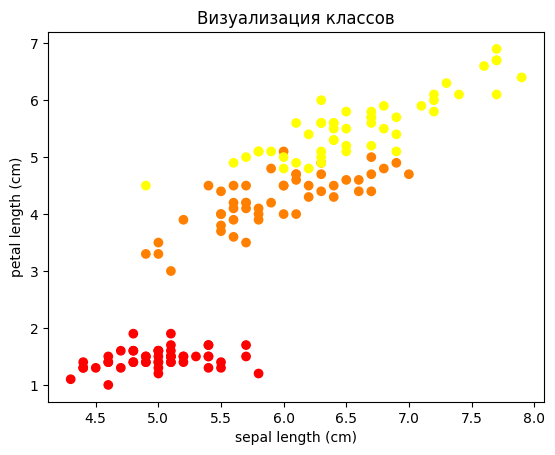

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

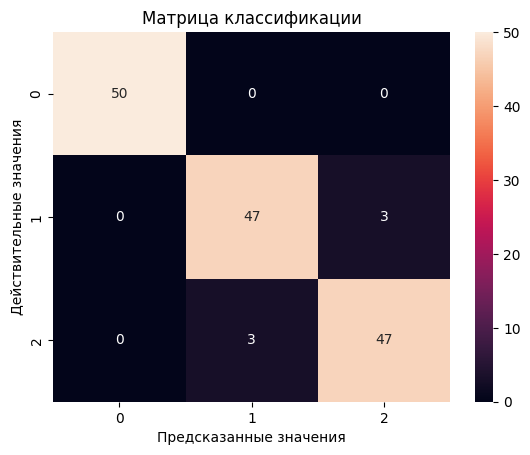

In [ ]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [ ]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

In [ ]:
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


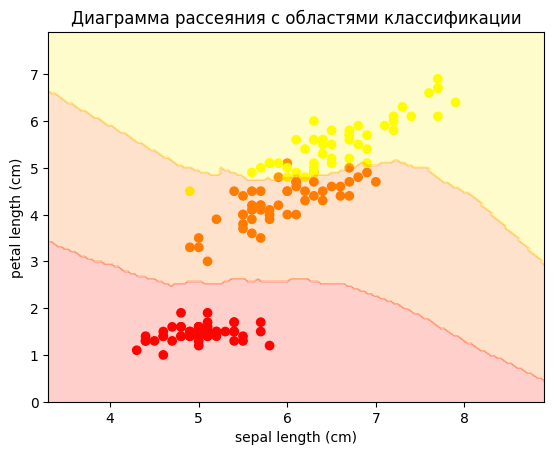

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [ ]:
observation_new = [[5.5, 5]]

In [ ]:
observation_new_scaled = scaler.transform(observation_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
knn.predict(observation_new_scaled)

array([2])

In [ ]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [ ]:
distances, indices = knn.kneighbors(observation_new_scaled)

In [ ]:
distances, indices = knn.kneighbors(observation_new_scaled)

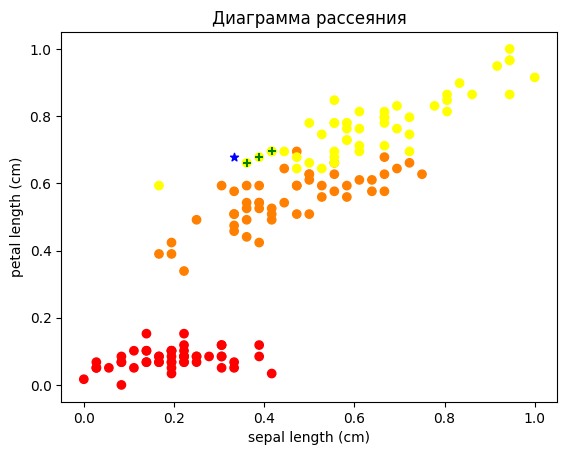

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

##Задания для самостоятельного выполнения

#### 1. Постройте последний график методических указаний в исходном пространстве признаков.


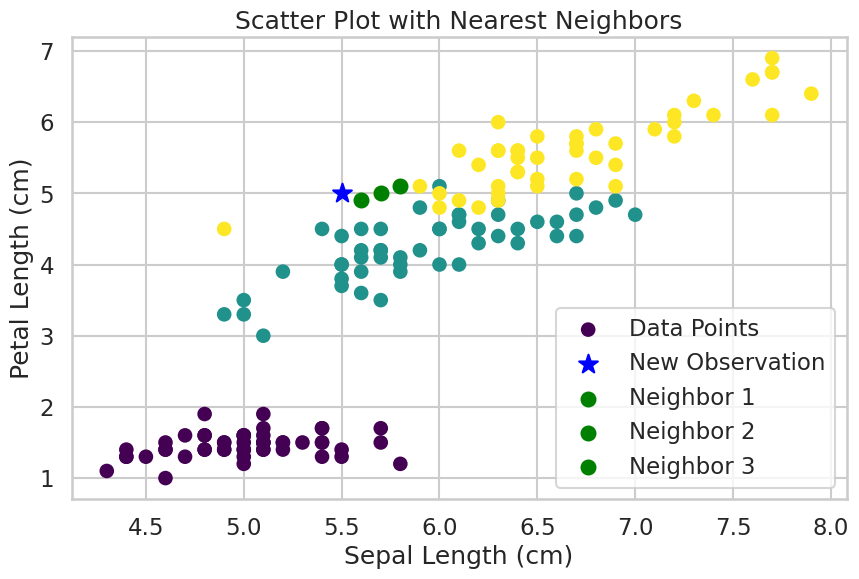

In [ ]:
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Нормализация данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Обучение модели
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

# Новое наблюдение
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)

# Получение ближайших соседей
distances, indices = knn.kneighbors(observation_new_scaled)

# Развернуть значения соседей в исходном масштабе
reverse = scaler.inverse_transform(X_scaled[indices[0]])

plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Data Points')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='blue', s=200, label='New Observation')

for i in range(3):
    plt.scatter(reverse[i][0], reverse[i][1], marker='o', color='green', s=100, label=f'Neighbor {i+1}')

plt.title("Scatter Plot with Nearest Neighbors")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()


#### 2. Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.


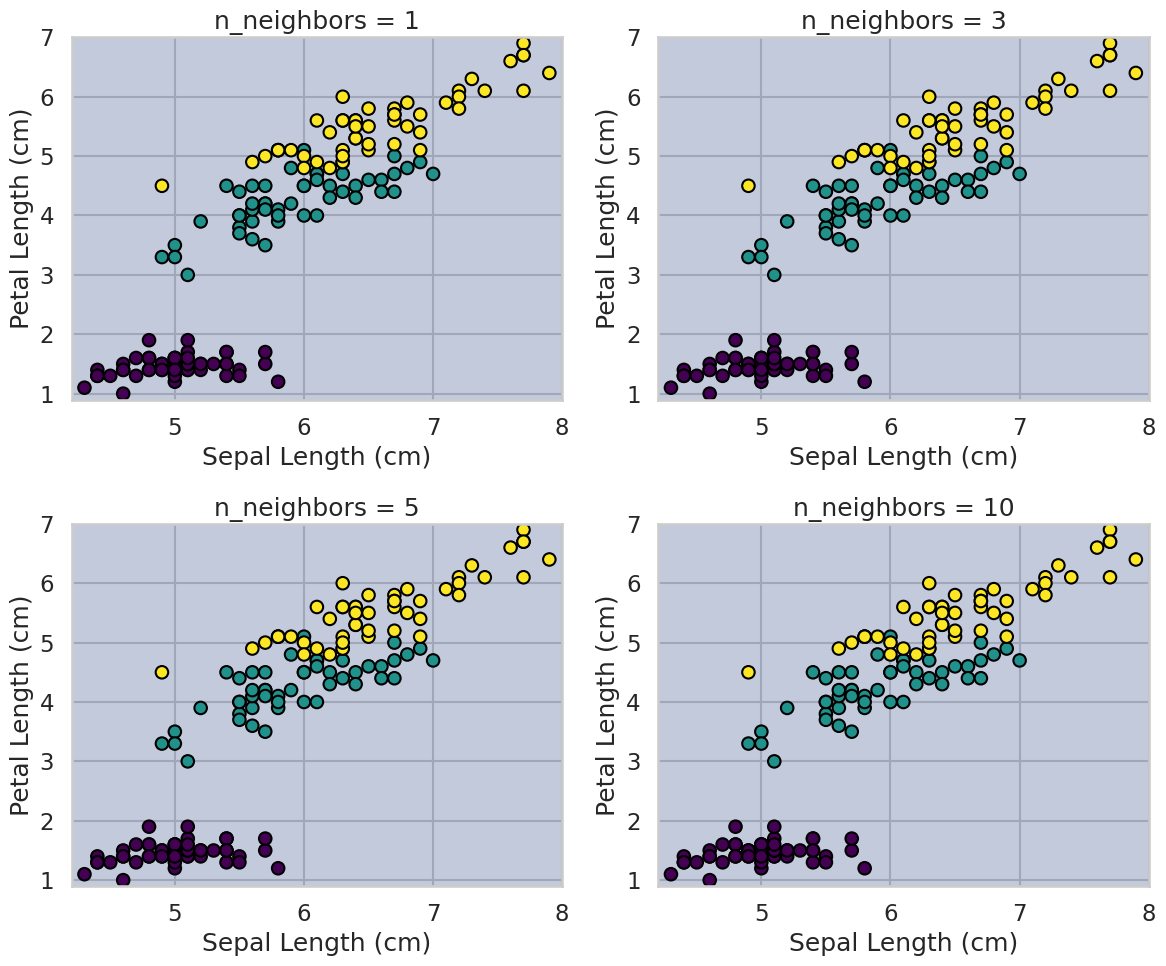

In [ ]:
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

n_neighbors_values = [1, 3, 5, 10]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, n_neighbors in enumerate(n_neighbors_values):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_scaled, y)

    # Предсказание классов для всех точек в пространстве признаков
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация границ решений
    axs[i//2, i%2].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    # Визуализация исходных данных
    axs[i//2, i%2].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')

    axs[i//2, i%2].set_title(f'n_neighbors = {n_neighbors}')
    axs[i//2, i%2].set_xlabel('Sepal Length (cm)')
    axs[i//2, i%2].set_ylabel('Petal Length (cm)')

plt.tight_layout()
plt.show()


####3. Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?


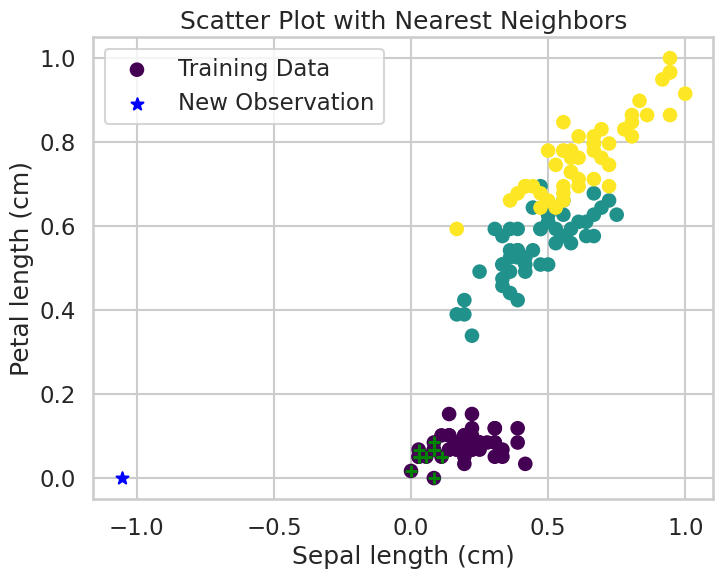

In [ ]:
observation_new = [[0.5, 1]]
observation_new_scaled = scaler.transform(observation_new)

plt.figure(figsize=(8, 6))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', label='Training Data')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b', label='New Observation')

distances, indices = knn.kneighbors(observation_new_scaled)
nearest_neighbors = X_scaled[indices[0]]
for neighbor in nearest_neighbors:
    plt.scatter(neighbor[0], neighbor[1], marker='+', color='g')

plt.title("Scatter Plot with Nearest Neighbors")
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()


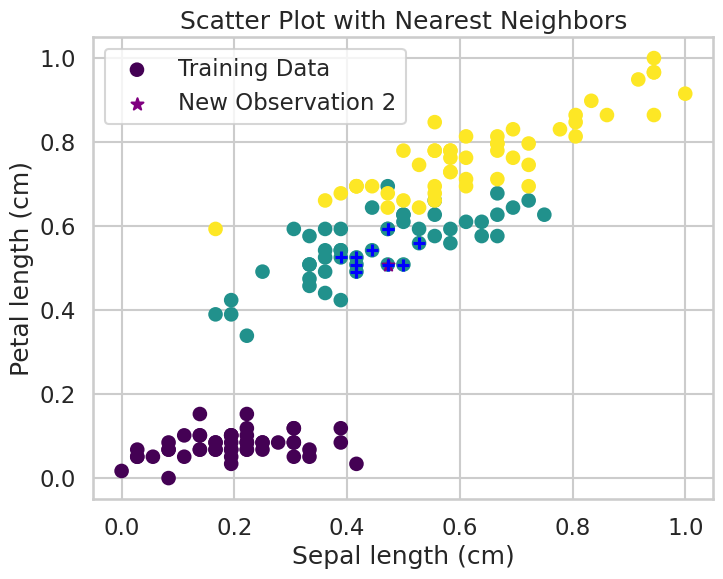

In [ ]:
observation_new_2 = [[6, 4]]
observation_new_scaled_2 = scaler.transform(observation_new_2)

plt.figure(figsize=(8, 6))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', label='Training Data')

plt.scatter(observation_new_scaled_2[0][0], observation_new_scaled_2[0][1], marker='*', color='purple', label='New Observation 2')

distances_2, indices_2 = knn.kneighbors(observation_new_scaled_2)
nearest_neighbors_2 = X_scaled[indices_2[0]]
for neighbor in nearest_neighbors_2:
    plt.scatter(neighbor[0], neighbor[1], marker='+', color='blue')

plt.title("Scatter Plot with Nearest Neighbors")
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()


#### 4. Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.


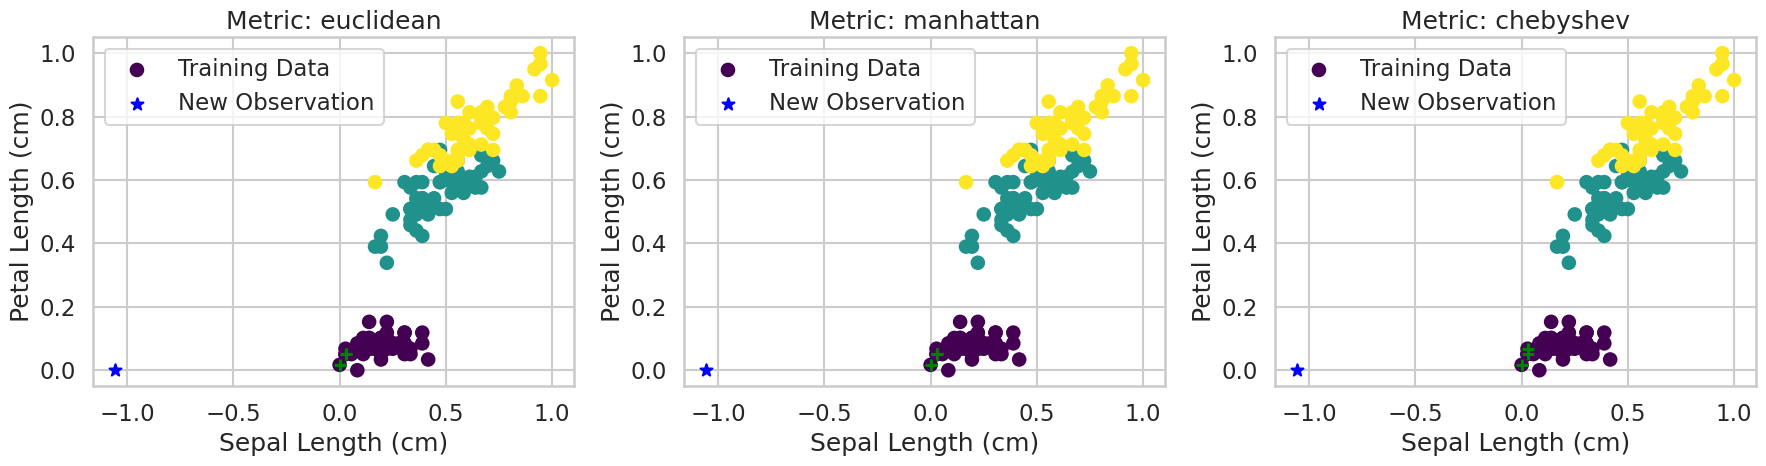

In [ ]:
metrics = ['euclidean', 'manhattan', 'chebyshev']

fig, axs = plt.subplots(1, len(metrics), figsize=(18, 5))

for i, metric in enumerate(metrics):
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_scaled, y)

    distances, indices = knn.kneighbors(observation_new_scaled)
    nearest_neighbors = X_scaled[indices[0]]

    axs[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', label='Training Data')

    axs[i].scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='blue', label='New Observation')

    for neighbor in nearest_neighbors:
        axs[i].scatter(neighbor[0], neighbor[1], marker='+', color='green')

    axs[i].set_title(f'Metric: {metric}')
    axs[i].set_xlabel('Sepal Length (cm)')
    axs[i].set_ylabel('Petal Length (cm)')
    axs[i].legend()

plt.tight_layout()
plt.show()


#### 5. Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 3, 5, 7, 9]

accuracy_scores = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_scores[k] = accuracy

for k, accuracy in accuracy_scores.items():
    print(f"Accuracy for k={k}: {accuracy:.4f}")


Accuracy for k=1: 1.0000
Accuracy for k=3: 1.0000
Accuracy for k=5: 1.0000
Accuracy for k=7: 1.0000
Accuracy for k=9: 1.0000


#### 6. Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.

In [ ]:
weight_options = ['uniform', 'distance']

accuracy_scores_weighted = {}

for weight_option in weight_options:
    knn_weighted = KNeighborsClassifier(n_neighbors=5, weights=weight_option)
    knn_weighted.fit(X_train_scaled, y_train)

    y_pred_weighted = knn_weighted.predict(X_test_scaled)
    accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

    accuracy_scores_weighted[weight_option] = accuracy_weighted

for weight_option, accuracy_weighted in accuracy_scores_weighted.items():
    print(f"Accuracy with weights='{weight_option}': {accuracy_weighted:.4f}")


Accuracy with weights='uniform': 1.0000
Accuracy with weights='distance': 1.0000


#### 7. Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.


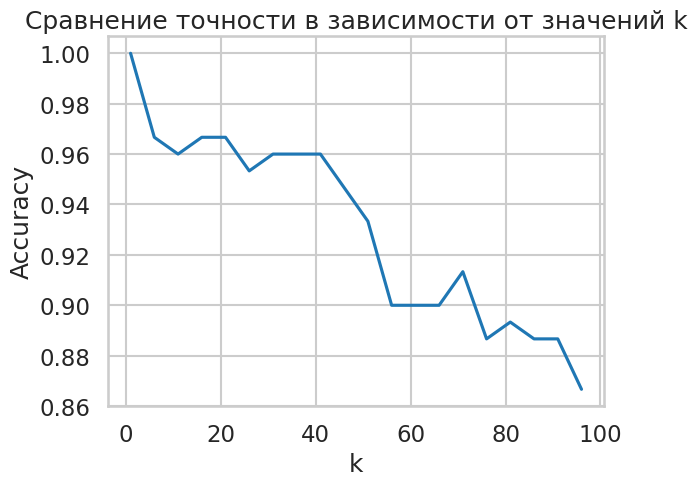

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def test_accuracy(x, y, k):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(x)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)

    y_pred = knn.predict(X_scaled)
    return accuracy_score(y, y_pred)

iris = load_iris()
x = iris.data
y = iris.target

accuracies = []
k_values = np.arange(1, 100, 5)

for k in k_values:
    accuracies.append(test_accuracy(x, y, k))

plt.plot(k_values, accuracies)
plt.title("Сравнение точности в зависимости от значений k")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


#### 8. Выберите датасет и постройте регрессию при помощи метода ближайших соседей.


Mean Squared Error: 3047.449887640449


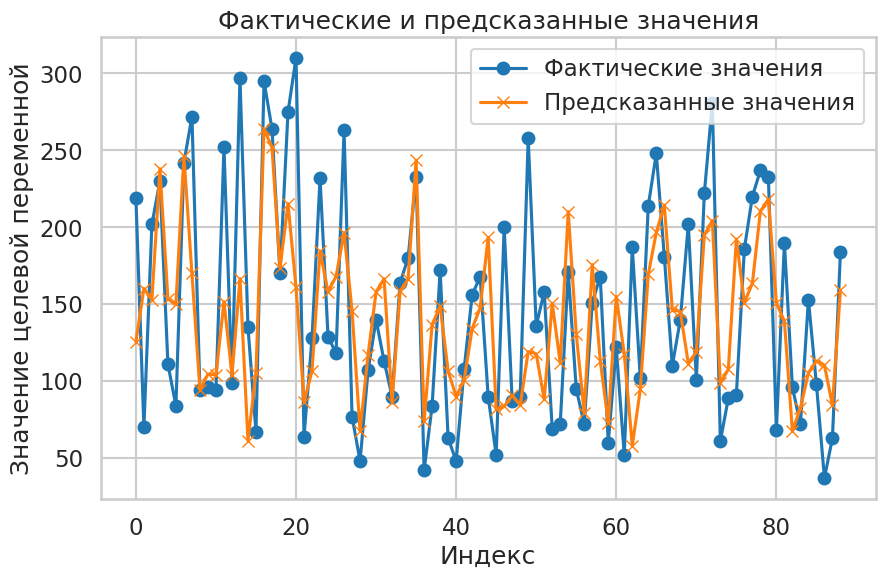

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

y_pred = knn_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Фактические значения', marker='o')
plt.plot(y_pred, label='Предсказанные значения', marker='x')
plt.title("Фактические и предсказанные значения")
plt.xlabel("Индекс")
plt.ylabel("Значение целевой переменной")
plt.legend()
plt.grid(True)
plt.show()
